In [4]:

!pip install tensorflow numpy matplotlib

import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from google.colab import files
import shutil


In [6]:

uploaded = files.upload()


zip_path = next(iter(uploaded))
extract_path = 'archive (3)'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


nested_path = os.path.join(extract_path, 'music_instruments')
if os.path.exists(nested_path):
    for item in os.listdir(nested_path):
        shutil.move(os.path.join(nested_path, item), extract_path)
    shutil.rmtree(nested_path)

print("✅ Dataset ready at:", extract_path)


Saving archive (3).zip to archive (3) (1).zip
✅ Dataset ready at: archive (3)


In [7]:

img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    extract_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    extract_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1448 images belonging to 10 classes.
Found 358 images belonging to 10 classes.


In [8]:

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.1408 - loss: 2.4468 - val_accuracy: 0.3855 - val_loss: 1.8315
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.4152 - loss: 1.7231 - val_accuracy: 0.4749 - val_loss: 1.6079
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.5222 - loss: 1.4242 - val_accuracy: 0.5447 - val_loss: 1.4792
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6243 - loss: 1.1494 - val_accuracy: 0.5363 - val_loss: 1.5325
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7673 - loss: 0.7739 - val_accuracy: 0.5559 - val_loss: 1.4527
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8658 - loss: 0.4874 - val_accuracy: 0.5754 - val_loss: 1.7495
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9259 - loss: 0.2538 - val_accuracy: 0.5922 - val_loss: 1.8964
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9462 - loss: 0.1918 - val_accuracy: 0.5810 - val_loss:

In [9]:

model.save("instrument_classifier_model.h5")
print("✅ Model saved as 'instrument_classifier_model.h5'")


✅ Model saved as 'instrument_classifier_model.h5'


Saving 0170.jpg to 0170 (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


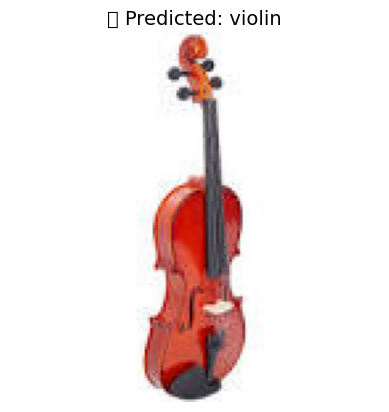

📂 0170 (2).jpg → violin



In [15]:

uploaded = files.upload()

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def predict_and_show_multiple(uploaded_files):
    model = load_model("instrument_classifier_model.h5")
    class_labels = list(train_data.class_indices.keys())

    for filename in uploaded_files.keys():

        img = image.load_img(filename, target_size=(img_height, img_width))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        predicted_label = class_labels[class_index]

        plt.imshow(mpimg.imread(filename))
        plt.title(f"🎵 Predicted: {predicted_label}", fontsize=14)
        plt.axis('off')
        plt.show()

        print(f"📂 {filename} → {predicted_label}\n")

predict_and_show_multiple(uploaded)
